[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/takumi-saka-mo/DEVIRSIFY_Analysis/blob/main/notebooks/AAPL.ipynb)


Apple社の財務データを用いて, 企業価値及び超過価値の計算をする.

さらに,セグメント売上高別にその事業をメインとして経営する企業と比較した仮想的な価値も導出する.


### Apple社のセグメントデータ
[AAPL_category.csv](https://github.com/takumi-saka-mo/DEVIRSIFY_Analysis/blob/main/data/AAPL_category.csv)

### 参照
https://www.apple.com/jp/newsroom/2024/10/apple-reports-fourth-quarter-results/

Apple社(証券コード : AAPL) ではiOSを搭載したモバイル端末(iPhone、iPad)などのデバイス販売をし, iCloudやApple Musicといったサブスクリプションサービスも提供されてる.







In [ ]:
# calculate_EXVAL ディレクトリに格納されているクラスをインストール
! pip install git+https://github.com/takumi-saka-mo/DEVIRSIFY_Analysis.git
from calculate_EXVAL import DiversifyApproach

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
url = "https://raw.githubusercontent.com/takumi-saka-mo/DEVIRSIFY_Analysis/main/data/AAPL_category.csv"
data = pd.read_csv(url, encoding = "UTF-8").set_index("Category")


data["Devices"] = data["iPhone"] + data["Mac"] + data["iPad"] + data["Wearables, Home and Accessories"]
data = data.drop(columns = ["iPhone", "Mac","iPad","Wearables, Home and Accessories"])
data

,Services,Devices
Category,,
Sales,96169,294866


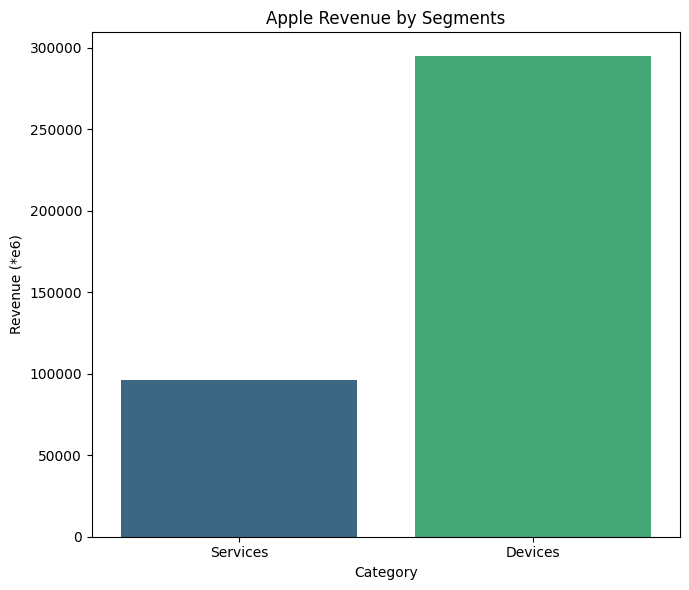

In [8]:
df = data.T.reset_index()
df.columns = ["Category", "Sales"]
plt.figure(figsize=(7, 6))
sns.barplot(data = df, x = "Category", y = "Sales", hue = "Category",  palette = "viridis")
plt.title("Apple Revenue by Segments")
plt.ylabel("Revenue (*e6)")
plt.xlabel("Category")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [9]:
# セグメント値の設定
seg1_value = data["Services"].iloc[0] * 1e6 # 単位 : 百万円
seg2_value = data["Devices"].iloc[0] * 1e6
seg_list = [seg1_value, seg2_value]

# 専業企業リスト
services_companies = ["NFLX", "DBX", "SPOT"]
devices_companies = ["HPQ", "DELL", "LNVGY"]
specialized_tickers = [services_companies, devices_companies]

# DiversifyApproach
div_approach = DiversifyApproach(
    ticker = "AAPL", # Apple
    specialized_tickers = specialized_tickers,
    data = data
)

# Appleの企業価値の計算
value = div_approach.calculate_value()
print(f"企業価値: {value}")

# EXVAL（超過価値）の計算
exval = div_approach.calculate_exval(seg_list)
print(f"超過価値 (EXVAL): {exval}")

企業価値: 3779919440704.0
超過価値 (EXVAL): 1.4030389647438637
